In [194]:
import csv
import pandas as pd
import re
from collections import Counter
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="ticks", color_codes=True)
import os
import networkx as nx
import netwulf as nw
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Below to download neccessary resource for SIA
#nltk.download('vader_lexicon')

DATA_DIR = "./data_csv"
GRAPH_DIR = "./graphs"

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Joshua\AppData\Roaming\nltk_data...


In [24]:
def makeList(string):
    "Takes string that is in a list or tuple format into a list"
    
    
    li = re.sub(r"^[\[\()]", "", string)
    li = re.sub(r"[\]\)]$", "", li)

    li = [word.strip("' ") for word in li.split(',') if word != '']
        
    return li

# Find Top Artists Code

In [25]:
def primary_and_features_Artists_List(df):
    "Returns a list of primary and feature artists. They repeat"
    primary_artists = []
    feature_artists = []
    
    for artists_list in df["Artists"]:
        li = makeList(artists_list)
        
        primary_artists.append(li[0])
        
        if len(li) > 1:
            for feature_artist in li[1:]:
                feature_artists.append(feature_artist)

    primary_artists = {'Primary Artists': primary_artists}
    feature_artists = {'Feature Artists': feature_artists}
    return primary_artists, feature_artists
    
def get_top_artists_year(df, year):
    "Given a Year, it will check the dataframe elements only with that year specified."
    prim, features= primary_and_features_Artists_List(df[df.Year.eq(year)])
    
    return prim, features   
    
def draw_Artists_Count_year(df, year):
    prim, features = get_top_artists_year(df, year)
    
    for data in (prim, features):
        category_text = list(data.keys())[0]
        g = sns.catplot(x=category_text, kind="count", palette="ch:.25", data=pd.DataFrame(data), height=5, aspect=3)


        axes = g.axes.flatten()
        axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 10, rotation=65, ha="right")
        axes[0].set_title(f"{category_text} Mentions {year}")
        
def draw_Artists_Count_per_year(df):
    "Draws the count of artist mentions throughout all the years"
    
    for i in range(2019 - 2006 + 1):
        year = 2006 + i
        
        draw_Artists_Count_year(df, year)
        
def draw_Artists_Count_Total(df):
    if os.path.exists("./graphs") == False:
        os.mkdir(GRAPH_DIR)
 
    prim, features = primary_and_features_Artists_List(df)
    
    prim_count = Counter(prim["Primary Artists"])
    feature_count = Counter(features["Feature Artists"])
    
    prim_df_data = {"Primary Artists": [], "Count": []}
    ft_df_data = {"Feature Artists": [], "Count": []}
    
    for data in ((prim_count,prim_df_data), (feature_count, ft_df_data)):
        for k, v in data[0].most_common(10):
            key_artist = list(data[1].keys())[0]
            key_count = list(data[1].keys())[1]
            data[1][key_artist].append(k)
            data[1][key_count].append(v)

    for data in (prim_df_data, ft_df_data):
        category_text = list(data.keys())[0]
        count = list(data.keys())[1]
        g = sns.catplot(x=category_text, y=count,  kind="bar", palette="ch:.25", data=pd.DataFrame(data), height=5, aspect=3)


        axes = g.axes.flatten()
        axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 10, rotation=65, ha="right")
        axes[0].set_title(f"{category_text} Mentions 2006-2019")

        g.savefig(f"{GRAPH_DIR}/{category_text}_Mentions_2006-2019.png")

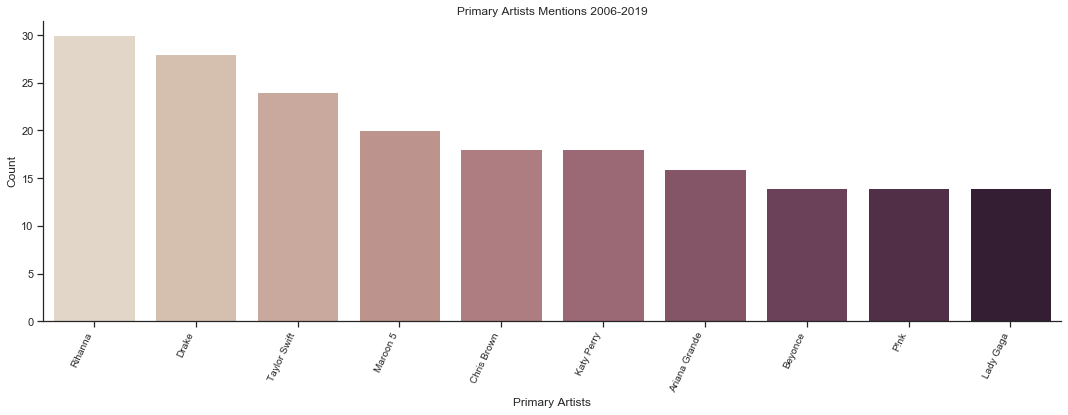

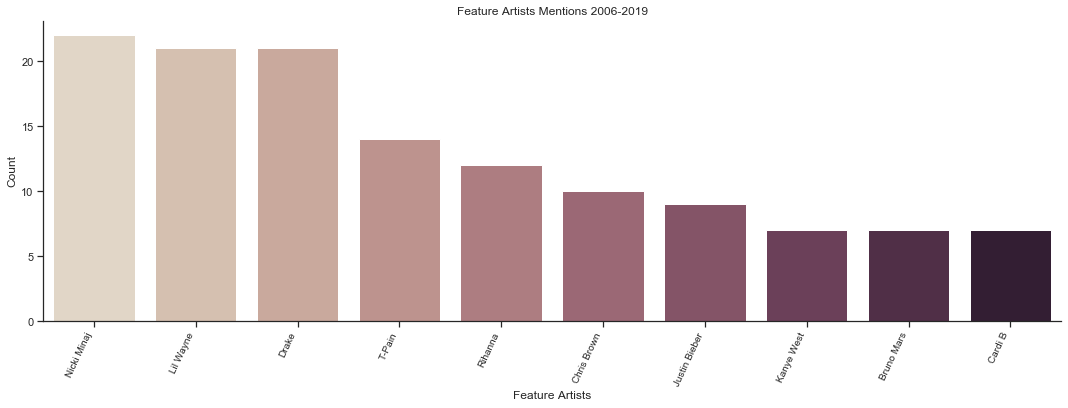

In [26]:
df = pd.read_csv(f"{DATA_DIR}/final_songs.csv")
draw_Artists_Count_Total(df)

# Find Top Producers Code

In [27]:
def producer_List(df):
    "Returns a list of primary and feature artists. They repeat"
    producers = []

    for producer_list in df["Producers"]:
        li = makeList(producer_list)
        
        for producer in li:
            producers.append(producer)


    producers = {'Producers': producers}

    return producers
    
def get_top_producers_year(df, year):
    "Given a Year, it will check the dataframe elements only with that year specified."
    prod = producer_List(df[df.Year.eq(year)])
    
    return prod   
    
def draw_producer_Count_year(df, year):
    prod = get_top_producers_year(df, year)
    
    category_text = list(prod.keys())[0]
    g = sns.catplot(x=category_text, kind="count", palette="ch:.25", data=pd.DataFrame(pro), height=5, aspect=3)

    axes = g.axes.flatten()
    axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 10, rotation=65, ha="right")
    axes[0].set_title(f"{category_text} Mentions {year}")

def draw_producer_Count_per_year(df):
    "Draws the count of artist mentions throughout all the years"
    
    for i in range(2019 - 2006 + 1):
        year = 2006 + i
        
        draw_producer_Count_year(df, year)
        
def draw_Producer_Count_Total(df, star_year=None, end_year=None):
    if os.path.exists("./graphs") == False:
        os.mkdir("./graphs")
    GRAPH_DIR = "./graphs"
    
    prod = producer_List(df)
    
    prod_count = Counter(prod["Producers"])

    prod_df_data = {"Producers": [], "Count": []}
    
    for data in ((prod_count, prod_df_data),):
        print(type(data))
        for k, v in data[0].most_common(10):
            key_artist = list(data[1].keys())[0]
            key_count = list(data[1].keys())[1]
            data[1][key_artist].append(k)
            data[1][key_count].append(v)

    for data in (prod_df_data,):
        category_text = list(data.keys())[0]
        count = list(data.keys())[1]
        g = sns.catplot(x=category_text, y=count,  kind="bar", palette="ch:.25", data=pd.DataFrame(data), height=5, aspect=3)


        axes = g.axes.flatten()
        axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 10, rotation=65, ha="right")
        axes[0].set_title(f"{category_text} Mentions 2006-2019")

        g.savefig(f"{GRAPH_DIR}/{category_text}_Mentions_2006-2019.png")
        
def draw_Producer_Count_Year_Range(df, start_year, end_year):
    if os.path.exists("./graphs") == False:
        os.mkdir("./graphs")
    GRAPH_DIR = "./graphs"
    
    mask = (df['Year'] > start_year) & (df['Year'] <= end_year)
    
    prod = producer_List(df.loc[mask])
    
    prod_count = Counter(prod["Producers"])

    prod_df_data = {"Producers": [], "Count": []}
    
    for data in ((prod_count, prod_df_data),):
        for k, v in data[0].most_common(10):
            key_artist = list(data[1].keys())[0]
            key_count = list(data[1].keys())[1]
            data[1][key_artist].append(k)
            data[1][key_count].append(v)

    for data in (prod_df_data,):
        category_text = list(data.keys())[0]
        count = list(data.keys())[1]
        g = sns.catplot(x=category_text, y=count,  kind="bar", palette="ch:.25", data=pd.DataFrame(data), height=5, aspect=3)


        axes = g.axes.flatten()
        axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 10, rotation=65, ha="right")
        axes[0].set_title(f"{category_text} Mentions {start_year}-{end_year}")

        g.savefig(f"{GRAPH_DIR}/{category_text}_Mentions_{start_year}-{end_year}.png")

<class 'tuple'>


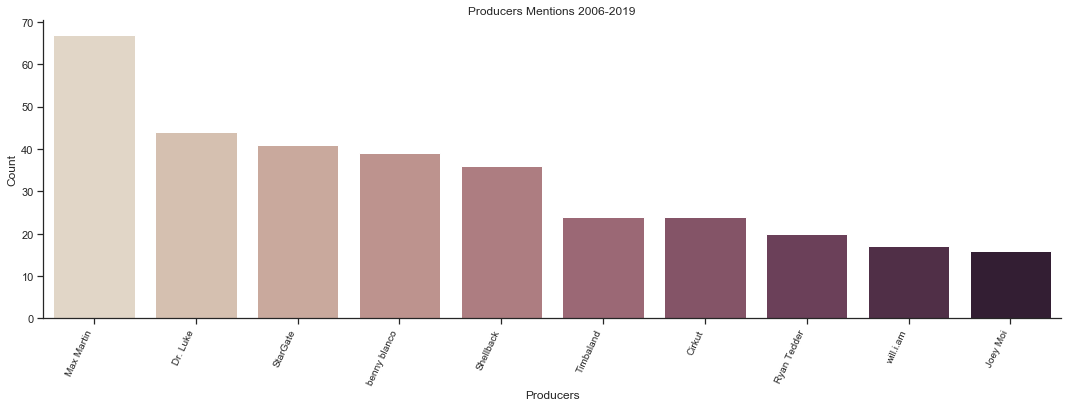

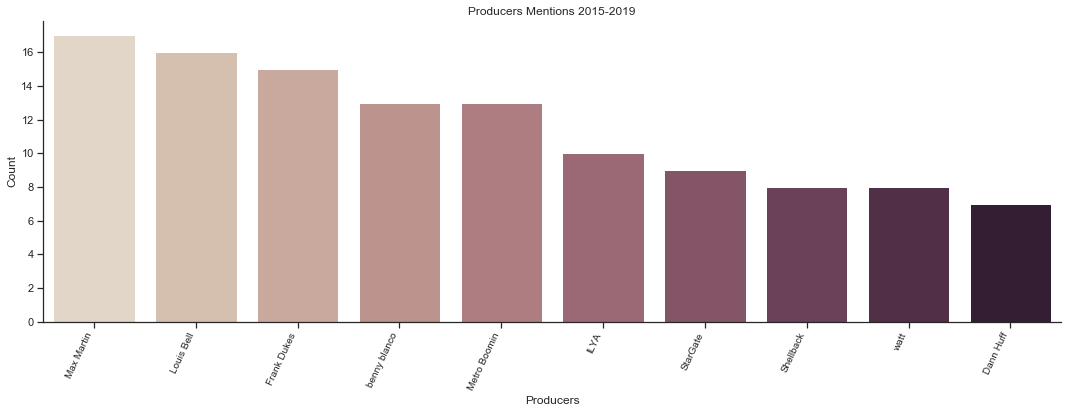

In [28]:
draw_Producer_Count_Total(df)
draw_Producer_Count_Year_Range(df, 2015, 2019)

# Create List of Artist Producer Pairs

In [94]:
start_year = 2015
end_year = 2016

#mask = (df['Year'] > start_year) & (df['Year'] <= end_year)
artists_producers_df = df[['Artists', "Producers"]]
#artists_producers_df = artists_producers_df.loc[mask] 

def add_pair(pair, d, index):
    
    d[pair].add(index)
    d[(pair[1], pair[0])].add(index)


def assign_color(string):
    
    if string == "Artists":
        return "red"
    if string == "Producers":
        return "blue"

def draw_network_year_range(df, start_year, end_year):

    mask = (df['Year'] >= start_year) & (df['Year'] <= end_year)
    
    net = draw_network_total(df.loc[mask])
    
    return net

def draw_network_total(df):

    artists_producers_df = df[['Artists', "Producers"]]
    
    pairs_dict = defaultdict(dict)
    pairs_dict["Artists 2 Producers"] = defaultdict(set)
    pairs_dict["Artists 2 Artists"] = defaultdict(set)
    pairs_dict["Producers 2 Producers"] = defaultdict(set)
    pairs_dict["Producers 2 Artists"] = defaultdict(set)

    pairs_with_songs = defaultdict(set)
    
    for i, row in artists_producers_df.iterrows():

        artists = makeList(row["Artists"])
        producers = makeList(row['Producers'])

        for k, artist in enumerate(artists):

            for producer in producers:
                pair1 = (artist, producer)

                pairs_dict["Artists 2 Producers"][artist].add(producer)
                pairs_dict["Producers 2 Artists"][producer].add(artist)

                add_pair(pair1, pairs_with_songs, i)

            j = k+1
            while(j < len(artists)):

                pair2 = (artist, artists[j])

                pairs_dict["Artists 2 Artists"][artist].add(artists[j])
                pairs_dict["Artists 2 Artists"][artists[j]].add(artist)

                add_pair(pair2, pairs_with_songs, i)

                j += 1


        for k, producer in enumerate(producers):

            j = k+1
            while(j < len(producers)):

                pair3 = (producer, producers[j])

                pairs_dict["Producers 2 Producers"][producer].add(producers[j])
                pairs_dict["Producers 2 Producers"][producers[j]].add(producer)

                add_pair(pair3, pairs_with_songs, i)

                j += 1

    # Create graoh of pairs
    g = nx.Graph()            
    for pair_dict in pairs_dict:
        person1_type, partners_type = [person_type.strip() for person_type in pair_dict.split('2')]

        for person1 in pairs_dict[pair_dict]:
            partners = pairs_dict[pair_dict][person1]

            if len(partners) > 0:
                for partner in partners:

                    # Check if the edges exist -> meaning nodes are already established
                    if g.has_edge(person1, partner):
                        pairs_with_songs[(person1, partner)]

                        songs_tracked = g[person1][partner]["songs"][0]
                        songs_tracked.add(i)

                        g[person1][partner]["songs"] = (songs_tracked,)

                    else:
                        # If edge is not established, check if both nodes already exist, if not create with apprioate type tagging
                        if g.has_node(person1) == False:
                            g.add_node(person1,group=assign_color(person1_type))

                        if g.has_node(partner) == False:
                            g.add_node(partner, group=assign_color(partners_type))

                        songs_tracked = pairs_with_songs[(person1, partner)]

                        # Finally add edge, with setting its tracking of song indexes from the final_songs.csv dataset as a set
                        g.add_edge(person1, partner, songs=(songs_tracked,))
                        
    return g

# Visualize Network

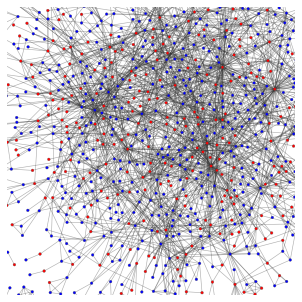

In [91]:
stylized_network, config = nw.visualize(g)

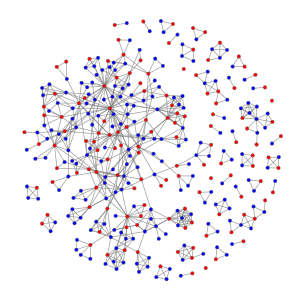

In [100]:
stylized_network1, config2 = nw.visualize(draw_network_year_range(df, 2018, 2019))

# Sentiment Analysis on Top 10 Artists Lyrics

In [253]:
# Song Info:
def clean_lyrics(lyric):
    text = re.sub(r'(\r\n)', " ", lyric)
    
    text = re.sub(r'(\[.*?\])', " ", text)
    
    text = re.sub(r'[\(\)]', ' ', text)
    
    text = re.sub(r'\s\s+', ' ', text)
    
    return text

# Get Sentiment Analysis for Lyrics for top 10 Artists per year
def get_Lyrics_Sentiment_Top_10_per_year(df, net):
    
    sia = SentimentIntensityAnalyzer()
    
    lyrics_sentiment_dfs = []
    
    for i in range(2019 - 2006 + 1):
        year = 2006 + i
        mask = (df['Year'] == year)
        
        lyrics_sentiment_df = defaultdict(list)
        lyrics_sentiment_df['Artist']
        lyrics_sentiment_df['Year']
        
        year_df = df.loc[mask]
        
        prim, features = get_top_artists_year(year_df, year)
        prim_count = Counter(prim["Primary Artists"])
        
        # Get the top ten artist of that year
        for data in (prim_count,):
            for artist, count in data.most_common(10):
                lyrics_sentiment_df['Artist'].append(artist)
                lyrics_sentiment_df['Year'].append(year)
                pairs = list(net.edges(artist))
                song_ids = set()
                
                for pair in pairs:
                    songs = net[pair[0]][pair[1]]['songs'][0]
                    for song in songs:
                        song_ids.add(song)
                
                # Track polarities for artist
                polarity_scores = defaultdict(list)
                polarity_scores['neg']
                polarity_scores['neu']
                polarity_scores['pos']
                
                # Get polarity for each song and add to tracker
                for song_row in song_ids:
                    lyrics = df.iloc[song_row]['Lyrics']
                    
                    if df.iloc[song_row]['Year'] == year:
                        lyrics = clean_lyrics(lyrics)
                        df.iloc[song_row]
                        polarity = sia.polarity_scores(lyrics)

                        for sent in polarity:
                            if sent != 'compound':
                                polarity_scores[sent].append(polarity[sent])
                
                # Now calculate the polarity score avg and add it to the dataframe dict
                for pol in polarity_scores:
                    
                    avg = sum(polarity_scores[pol])/len(polarity_scores[pol])
                    
                    lyrics_sentiment_df[f'{pol} Avg Score'].append(avg)
        lyrics_sentiment_dfs.append(lyrics_sentiment_df) 
    return lyrics_sentiment_dfs

In [258]:
frames = [pd.DataFrame(data) for data in get_Lyrics_Sentiment_Top_10_per_year(df, g)]

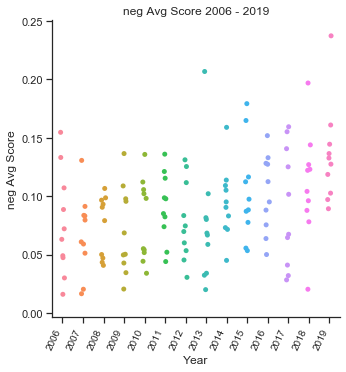

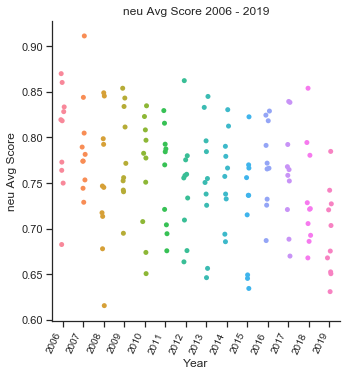

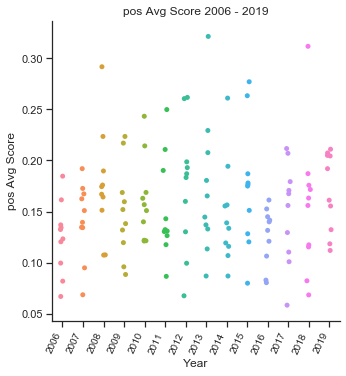

In [262]:
def draw_sentiment_graphs_Total(frames):
    "Given sentiment scores of the top 10 artists per year over all 13 years, plot the distribution. First combine the dfs"
    
    # Concatenate datagframes
    full_df = pd.concat(frames)
    
    for sentiment_type in ['neg', 'neu', 'pos']:
        sentiment_type_score = f'{sentiment_type} Avg Score'
        
        graph = sns.catplot(x="Year", y=sentiment_type_score, data=full_df)
        
        axes = graph.axes.flatten()
        axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 10, rotation=65, ha="right")
        axes[0].set_title(f"{sentiment_type_score} 2006 - 2019")

        graph.savefig(f"{GRAPH_DIR}/{sentiment_type_score}_2006-2019.png")
    
draw_sentiment_graphs_Total(frames)